In [2]:
#!pip install plotnine

     ---------------------------------------- 1.2/1.2 MB 5.6 MB/s eta 0:00:00
     ---------------------------------------- 64.7/64.7 kB ? eta 0:00:00
     ------------------------------------- 340.1/340.1 kB 10.3 MB/s eta 0:00:00
     ---------------------------------------- 111.8/111.8 kB ? eta 0:00:00


In [3]:
import numpy as np # linear algebra
import pandas as pd
import time
import scipy.stats as stats
import math
import statsmodels.api as sm
import pylab as py
import random
from plotnine import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [4]:
%%time
df = pd.concat(map(pd.read_csv, ['02-15-2018.csv','02-16-2018.csv']), ignore_index=True)

CPU times: total: 7.08 s
Wall time: 11.6 s


In [5]:
print('Numero de Linhas (Samples): %s' % str((df.shape[0])))
print('Numero de Colunas (Features): %s' % str((df.shape[1])))

Numero de Linhas (Samples): 2097149
Numero de Colunas (Features): 80


In [6]:
df

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,15/02/2018 08:25:18,112641158,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320579.0,7.042784e+02,56321077,56320081,Benign
1,22,6,15/02/2018 08:29:05,37366762,14,12,2168,2993,712,0,...,32,1024353.0,649038.754495,1601183,321569,11431221.0,3.644991e+06,15617415,8960247,Benign
2,47514,6,15/02/2018 08:29:42,543,2,0,64,0,64,0,...,32,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,Benign
3,0,0,15/02/2018 08:28:07,112640703,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320351.5,3.669884e+02,56320611,56320092,Benign
4,0,0,15/02/2018 08:30:56,112640874,3,0,0,0,0,0,...,0,0.0,0.000000,0,0,56320437.0,7.198347e+02,56320946,56319928,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097144,21,6,16/02/2018 10:36:33,3,1,1,0,0,0,0,...,40,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,DoS attacks-SlowHTTPTest
2097145,21,6,16/02/2018 10:36:33,3,1,1,0,0,0,0,...,40,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,DoS attacks-SlowHTTPTest
2097146,21,6,16/02/2018 10:36:33,3,1,1,0,0,0,0,...,40,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,DoS attacks-SlowHTTPTest
2097147,21,6,16/02/2018 10:36:33,5,1,1,0,0,0,0,...,40,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,DoS attacks-SlowHTTPTest


In [7]:
df.memory_usage().sum() /1024**2

1279.998291015625

In [8]:
df.drop(["Timestamp"], axis=1, inplace=True)

In [9]:
df.isna().sum().sort_values(ascending=False)[0:10]

Flow Byts/s         4921
Dst Port               0
Bwd Byts/b Avg         0
Fwd Pkts/b Avg         0
Fwd Byts/b Avg         0
Bwd Seg Size Avg       0
Fwd Seg Size Avg       0
Pkt Size Avg           0
Down/Up Ratio          0
ECE Flag Cnt           0
dtype: int64

In [10]:
rows_before = df.shape[0]

#Dataset.fillna(0, inplace=True) 
#limpeza = Dataset.replace([np.inf, -np.inf], 1)

rows_curr = df.dropna().shape[0]
print("{} linhas foram removidas, o que é equivalente a {}% do dataset".format(rows_before-rows_curr, 100-(rows_curr*100/rows_before)))

4921 linhas foram removidas, o que é equivalente a 0.23465190122399804% do dataset


In [11]:
df

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,112641158,3,0,0,0,0,0,0.000000,...,0,0.0,0.000000,0,0,56320579.0,7.042784e+02,56321077,56320081,Benign
1,22,6,37366762,14,12,2168,2993,712,0,154.857143,...,32,1024353.0,649038.754495,1601183,321569,11431221.0,3.644991e+06,15617415,8960247,Benign
2,47514,6,543,2,0,64,0,64,0,32.000000,...,32,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,Benign
3,0,0,112640703,3,0,0,0,0,0,0.000000,...,0,0.0,0.000000,0,0,56320351.5,3.669884e+02,56320611,56320092,Benign
4,0,0,112640874,3,0,0,0,0,0,0.000000,...,0,0.0,0.000000,0,0,56320437.0,7.198347e+02,56320946,56319928,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097144,21,6,3,1,1,0,0,0,0,0.000000,...,40,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,DoS attacks-SlowHTTPTest
2097145,21,6,3,1,1,0,0,0,0,0.000000,...,40,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,DoS attacks-SlowHTTPTest
2097146,21,6,3,1,1,0,0,0,0,0.000000,...,40,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,DoS attacks-SlowHTTPTest
2097147,21,6,5,1,1,0,0,0,0,0.000000,...,40,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,DoS attacks-SlowHTTPTest


In [12]:
#Removendo dados duplicados

df.drop_duplicates(inplace=True)
df.shape

(1476559, 79)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1476559 entries, 0 to 2048573
Data columns (total 79 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Dst Port           1476559 non-null  int64  
 1   Protocol           1476559 non-null  int64  
 2   Flow Duration      1476559 non-null  int64  
 3   Tot Fwd Pkts       1476559 non-null  int64  
 4   Tot Bwd Pkts       1476559 non-null  int64  
 5   TotLen Fwd Pkts    1476559 non-null  int64  
 6   TotLen Bwd Pkts    1476559 non-null  int64  
 7   Fwd Pkt Len Max    1476559 non-null  int64  
 8   Fwd Pkt Len Min    1476559 non-null  int64  
 9   Fwd Pkt Len Mean   1476559 non-null  float64
 10  Fwd Pkt Len Std    1476559 non-null  float64
 11  Bwd Pkt Len Max    1476559 non-null  int64  
 12  Bwd Pkt Len Min    1476559 non-null  int64  
 13  Bwd Pkt Len Mean   1476559 non-null  float64
 14  Bwd Pkt Len Std    1476559 non-null  float64
 15  Flow Byts/s        1471800 non-n

# Análise e Visualização de Dados

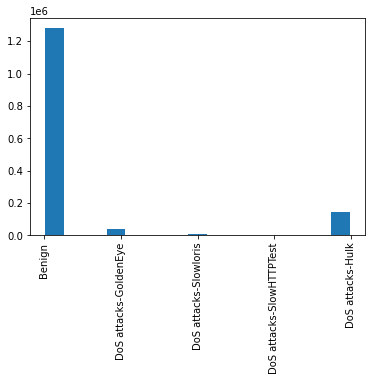

In [14]:
plt.hist(df['Label'], bins=15, rwidth=0.9) 
plt.xticks(rotation=90)
plt.show()

In [15]:
df['Label'].value_counts()

Benign                      1279991
DoS attacks-Hulk             145199
DoS attacks-GoldenEye         41406
DoS attacks-Slowloris          9908
DoS attacks-SlowHTTPTest         55
Name: Label, dtype: int64

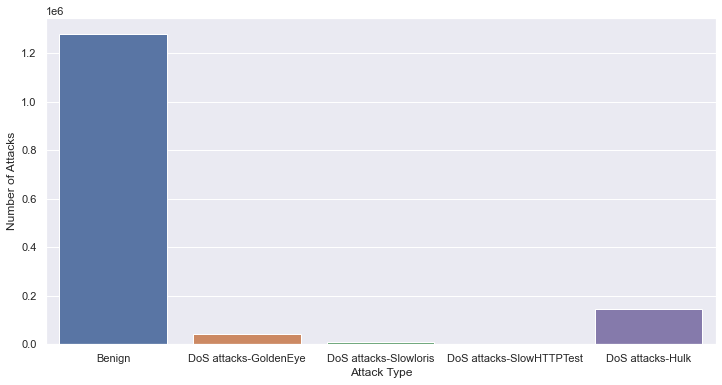

In [16]:
# make a plot number of labels
sns.set(rc={'figure.figsize':(12, 6)})
plt.xlabel('Attack Type')
sns.set_theme()
ax = sns.countplot(x='Label', data=df)
ax.set(xlabel='Attack Type', ylabel='Number of Attacks')
plt.show()

In [17]:
# Transformando infinitos em nan
df.replace([np.inf, -np.inf], np.nan, inplace=True)
  
# Removendo linhas com dados nan
df.dropna(inplace=True)

In [18]:
df2 = df.copy()

In [19]:
df2

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,112641158,3,0,0,0,0,0,0.000000,...,0,0.0,0.000000,0,0,56320579.0,7.042784e+02,56321077,56320081,Benign
1,22,6,37366762,14,12,2168,2993,712,0,154.857143,...,32,1024353.0,649038.754495,1601183,321569,11431221.0,3.644991e+06,15617415,8960247,Benign
2,47514,6,543,2,0,64,0,64,0,32.000000,...,32,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,Benign
3,0,0,112640703,3,0,0,0,0,0,0.000000,...,0,0.0,0.000000,0,0,56320351.5,3.669884e+02,56320611,56320092,Benign
4,0,0,112640874,3,0,0,0,0,0,0.000000,...,0,0.0,0.000000,0,0,56320437.0,7.198347e+02,56320946,56319928,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2048565,44356,6,4136655,5,3,935,381,935,0,187.000000,...,32,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,Benign
2048567,44360,6,4122212,5,3,935,413,935,0,187.000000,...,32,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,Benign
2048569,44358,6,4122731,5,3,935,335,935,0,187.000000,...,32,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,Benign
2048571,44376,6,4135673,5,3,935,309,935,0,187.000000,...,32,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,Benign


In [20]:
label_encoder = LabelEncoder()
labels_df = label_encoder.fit_transform(df2.Label)
labels_df

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
df2['Label']=labels_df
df2

,Dst Port,Protocol,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,112641158,3,0,0,0,0,0,0.000000,...,0,0.0,0.000000,0,0,56320579.0,7.042784e+02,56321077,56320081,0
1,22,6,37366762,14,12,2168,2993,712,0,154.857143,...,32,1024353.0,649038.754495,1601183,321569,11431221.0,3.644991e+06,15617415,8960247,0
2,47514,6,543,2,0,64,0,64,0,32.000000,...,32,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,0
3,0,0,112640703,3,0,0,0,0,0,0.000000,...,0,0.0,0.000000,0,0,56320351.5,3.669884e+02,56320611,56320092,0
4,0,0,112640874,3,0,0,0,0,0,0.000000,...,0,0.0,0.000000,0,0,56320437.0,7.198347e+02,56320946,56319928,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2048565,44356,6,4136655,5,3,935,381,935,0,187.000000,...,32,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,0
2048567,44360,6,4122212,5,3,935,413,935,0,187.000000,...,32,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,0
2048569,44358,6,4122731,5,3,935,335,935,0,187.000000,...,32,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,0
2048571,44376,6,4135673,5,3,935,309,935,0,187.000000,...,32,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,0


In [22]:
df2['Label'].value_counts()

0    1272279
2     145199
1      41406
4       9908
3         55
Name: Label, dtype: int64

In [23]:
# análise de correlação

correlation = df2.corr()

<AxesSubplot:>

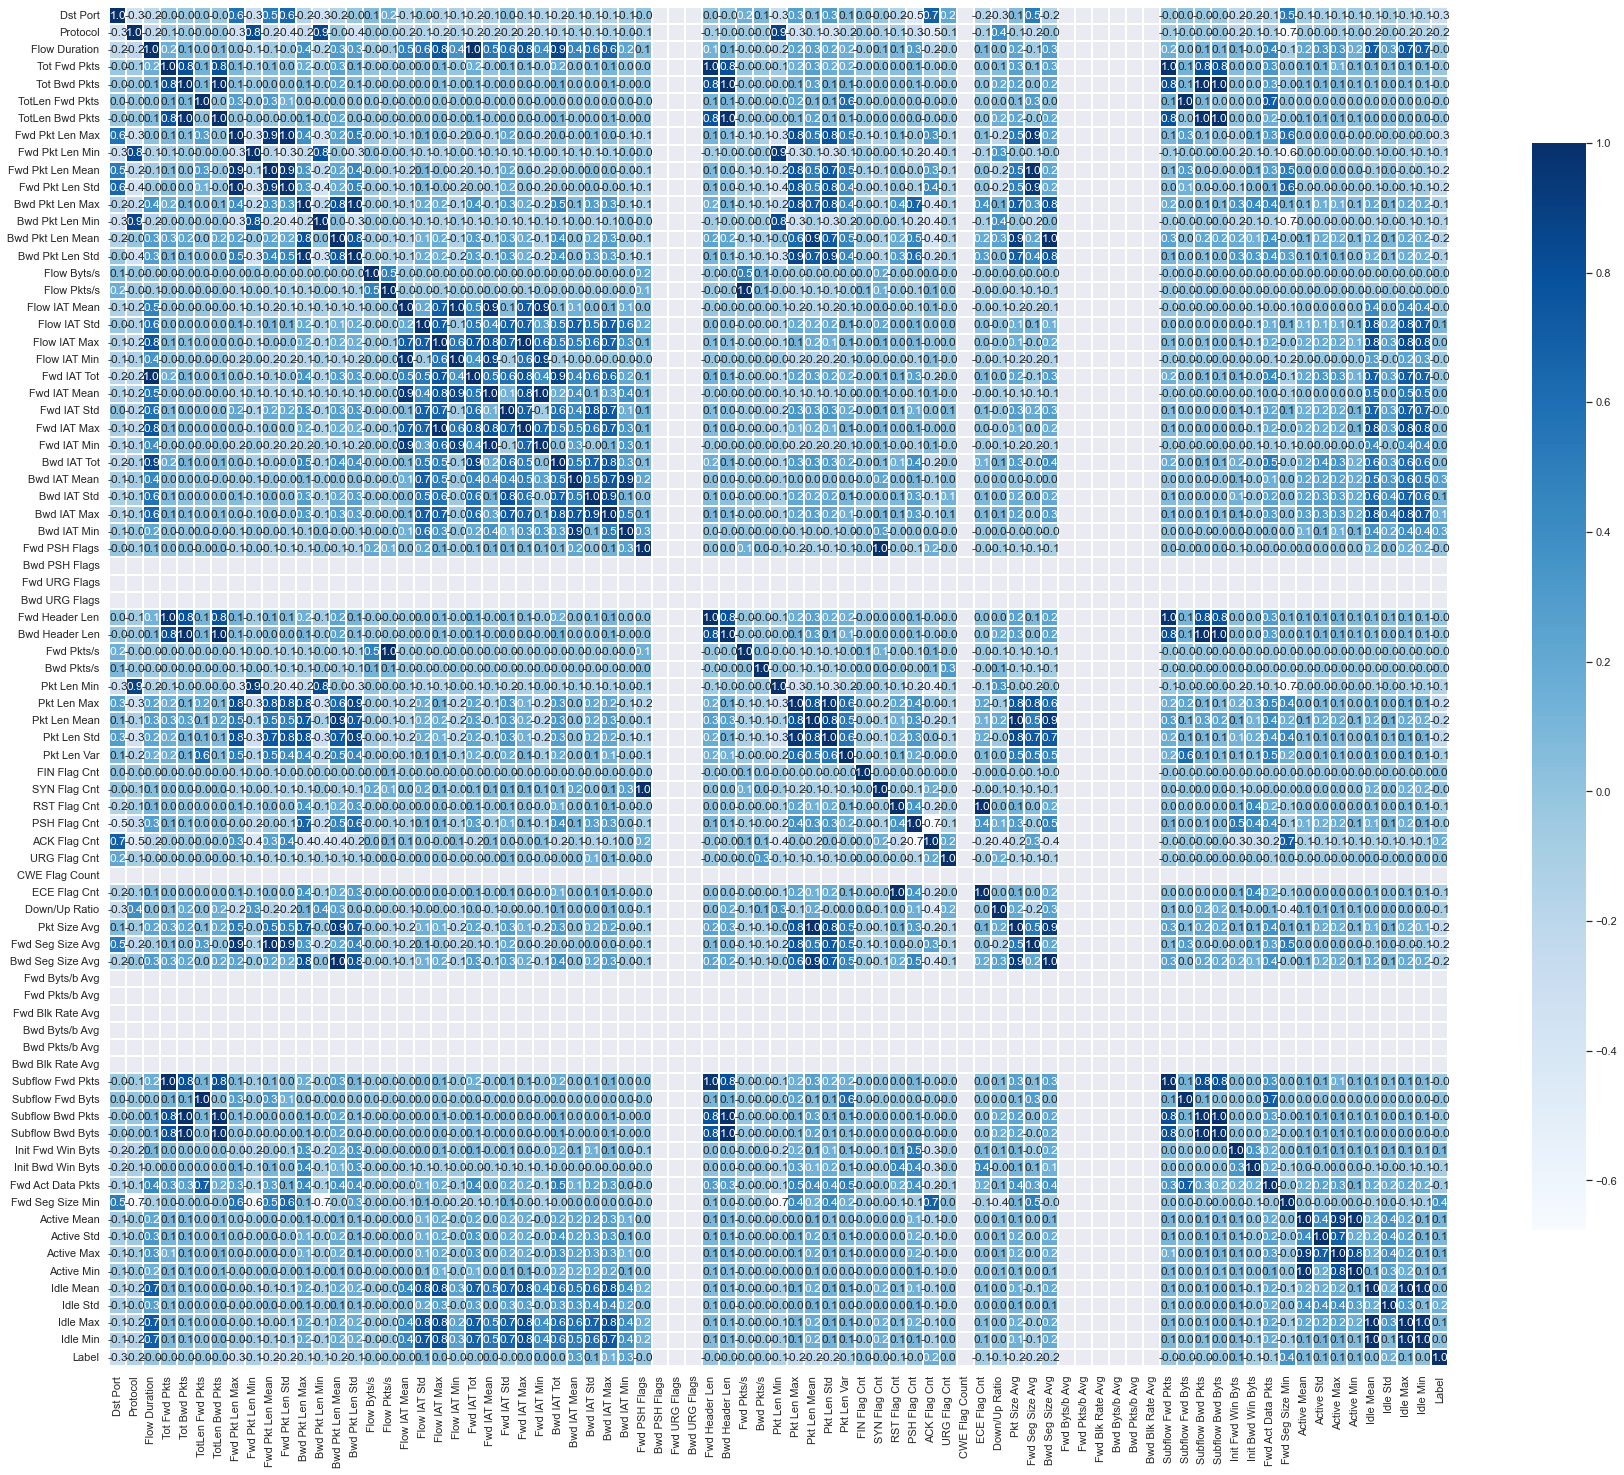

In [24]:
# plot da matriz de correlação
import seaborn as sn
plt.subplots(figsize=(30, 25))
plot = sn.heatmap(correlation,cmap='Blues',linewidth=0.1,cbar_kws={"shrink": .8},annot=True, fmt=".1f")
plot

In [25]:
#Verificando Correlação entre as colunas numericas com o Preco

corr = df2.corrwith(df2['Label'])
corr.sort_values(ascending=False)[0:11]

Label                1.000000
Fwd Seg Size Min     0.364284
Bwd IAT Mean         0.261185
Bwd IAT Min          0.251513
ACK Flag Cnt         0.157942
Idle Std             0.155101
Bwd IAT Max          0.135573
Active Mean          0.111742
Active Max           0.097837
Flow IAT Std         0.095246
Init Fwd Win Byts    0.093100
dtype: float64

In [26]:
#Selecionando colunas mais correlacionadas

correlated_columns = corr[corr > 0.158]
correlated_columns.sort_values(ascending=False)

Label               1.000000
Fwd Seg Size Min    0.364284
Bwd IAT Mean        0.261185
Bwd IAT Min         0.251513
dtype: float64

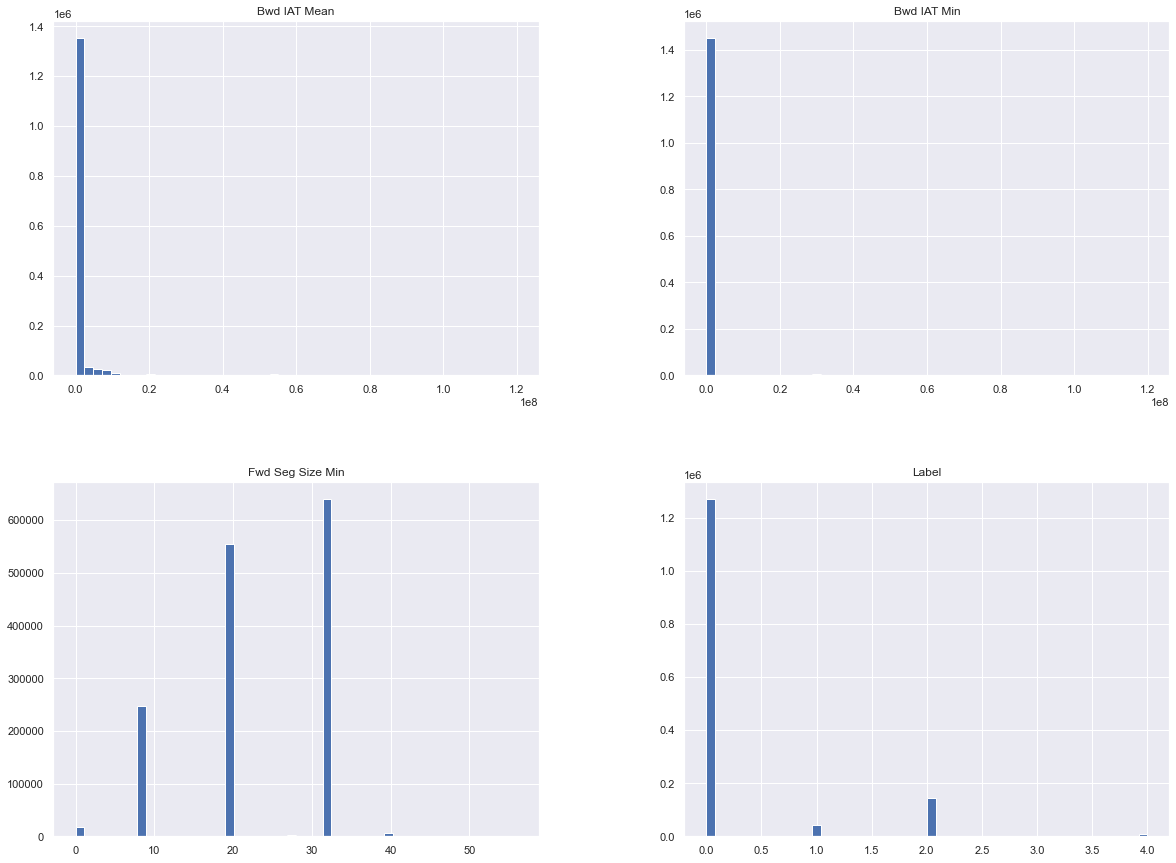

In [27]:
#Observando os histogramas das colunas mais correlacionadas

df2[correlated_columns.index].hist(bins=50, figsize=(20,15))
plt.show()

In [28]:
#Divindido dataset em treino e teste

from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.25, random_state=42)

for i, (train_index, test_index) in enumerate(sss.split(df2.iloc[:,:-1], df2["Label"])):
    strat_train_set = df2.iloc[train_index]
    strat_test_set = df2.iloc[test_index]
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[874143 339465 128982 ... 367767 284369 309636]
  Test:  index=[ 288784  923548 1207302 ...  390547  629994 1018614]
Fold 1:
  Train: index=[ 642582  532997  888527 ...  696726 1164257  598226]
  Test:  index=[ 523894  736959 1173541 ...  411346  907394  544676]
Fold 2:
  Train: index=[ 635590 1409777   13924 ... 1441386 1121244 1358099]
  Test:  index=[1003564 1022495  485625 ... 1321131  617402 1458083]
Fold 3:
  Train: index=[ 820365 1421466  939623 ...  327486 1097923 1467818]
  Test:  index=[1325074  477663  524539 ...  786333   34816  580829]
Fold 4:
  Train: index=[ 661954  668527  801003 ...  907491 1052350  924787]
  Test:  index=[1049675  244778  761984 ... 1062307  112496  369697]
Fold 5:
  Train: index=[ 868099 1393937  883124 ... 1004696 1197257  357698]
  Test:  index=[ 763032  391730  609231 ... 1355677   35605   68714]
Fold 6:
  Train: index=[ 879873 1027291  166598 ...  210441  748264  940337]
  Test:  index=[1249312 1437612  861628 ...  631546 1

In [29]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import scale
from sklearn.ensemble import ExtraTreesClassifier


##get_ipython().run_line_magic('matplotlib', 'inline')
start_time = time.process_time()

# Define features and target
X = df2.iloc[:,:-1]#.astype(float)
y = df2.iloc[:,-1]#.astype(float)

print("Iniciando seleção de atributos")

#Dividindo em X e Y

Xtrain = strat_train_set.drop("Label", axis=1)#.astype(float) # drop labels for training set
Ytrain = strat_train_set["Label"].copy()#.astype(float)

Xtest = strat_test_set.drop("Label", axis=1)#.astype(float) # drop labels for training set
Ytest = strat_test_set["Label"].copy()#.astype(float)


Iniciando seleção de atributos


In [30]:
#Treinando Random Forest Classifier com RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

#Parametros a testar

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

#Testando parametros

forest_clf_RS = RandomForestClassifier(random_state=42)

rnd_search_forest = RandomizedSearchCV(forest_clf_RS, 
                                param_distributions=param_distribs,
                                n_iter=3, 
                                cv=3, 
                                scoring='accuracy',
                                n_jobs=-1)

start_time = time.process_time()
rnd_search_forest.fit(Xtrain, Ytrain)
print('Tempo do Processo de treinamento: ',time.process_time()-start_time, 'seconds')

Tempo do Processo de treinamento:  213.265625 seconds


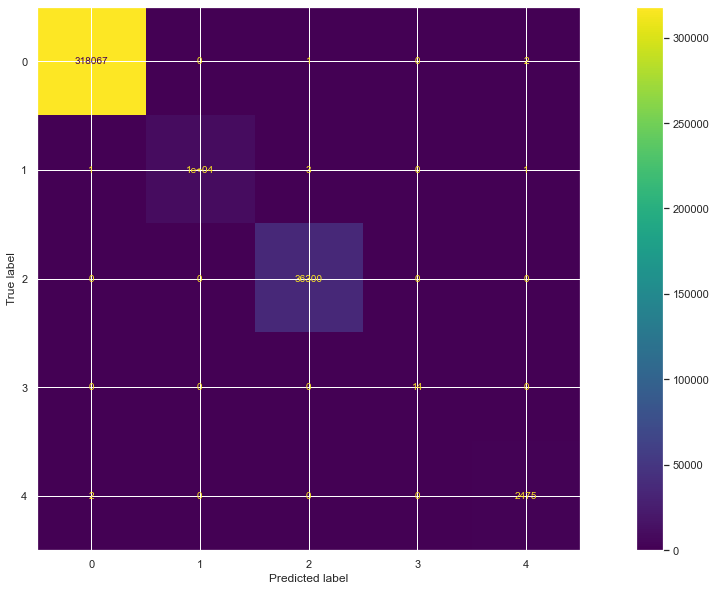

In [31]:
# Predição e matriz de confusão

y_pred = rnd_search_forest.predict(Xtest)

from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(Ytest, y_pred, labels=rnd_search_forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rnd_search_forest.classes_)
fig, ax = plt.subplots(figsize=(20,10))
disp.plot(ax=ax)
plt.show()

Feature ranking:
1. feature 69 (0.084773) name: Fwd Byts/b Avg
2. feature 35 (0.065830) name: Pkt Len Var
3. feature 66 (0.062401) name: RST Flag Cnt
4. feature 25 (0.048203) name: Pkt Len Mean
5. feature 0 (0.045755) name: Fwd Seg Size Min
6. feature 38 (0.034914) name: Pkt Len Std
7. feature 20 (0.033740) name: Fwd Pkt Len Max
8. feature 37 (0.031966) name: Bwd IAT Max
9. feature 22 (0.030383) name: Subflow Bwd Byts
10. feature 19 (0.030267) name: Bwd Pkt Len Max
11. feature 4 (0.027440) name: Dst Port
12. feature 17 (0.024959) name: Pkt Len Max
13. feature 2 (0.024906) name: Init Fwd Win Byts
14. feature 64 (0.023789) name: SYN Flag Cnt
15. feature 36 (0.023146) name: Pkt Size Avg
16. feature 21 (0.022500) name: Init Bwd Win Byts
17. feature 24 (0.022410) name: ACK Flag Cnt
18. feature 40 (0.019586) name: Bwd IAT Min
19. feature 16 (0.018161) name: Fwd IAT Max
20. feature 11 (0.017382) name: Flow IAT Mean
21. feature 7 (0.016226) name: Fwd Pkts/s
22. feature 67 (0.014657) name: ECE 

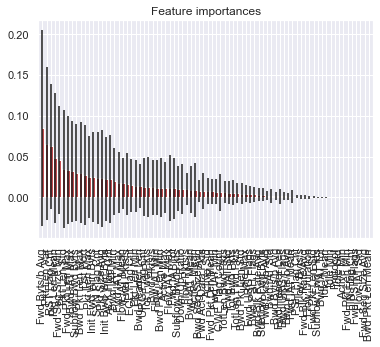

In [32]:
# Features importances
importances = rnd_search_forest.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in rnd_search_forest.best_estimator_.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
feature_list = [X.columns[indices[f]] for f in range(X.shape[1])]  #names of features.
ff = np.array(feature_list)

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f) name: %s" % (f + 1, indices[f], importances[indices[f]], ff[indices[f]]))


# Plot the feature importances of the forest
plt.figure()
plt.rcParams['figure.figsize'] = [16, 6]
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), ff[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [33]:
## The new additions to get feature importance to classes: 

# To get the importance according to each class:
def class_feature_importance(X, Y, feature_importances):
    N, M = X.shape
    X = scale(X)

    out = {}
    for c in set(Y):
        out[c] = dict(
            zip(range(N), np.mean(X[Y==c, :], axis=0)*feature_importances)
        )

    return out

result = class_feature_importance(X, y, importances)
print (json.dumps(result,indent=4))


{
    "0": {
        "0": 0.005700286295735783,
        "1": 0.00010084980145099268,
        "2": 0.0006603614780261257,
        "3": 7.868343937518721e-05,
        "4": 0.0002269527471755375,
        "5": 3.241458751900792e-05,
        "6": 5.2552725803790625e-05,
        "7": 0.0016582833980613432,
        "8": 5.226328402719979e-05,
        "9": 0.0011514491758425102,
        "10": 0.0005359587450221089,
        "11": 0.0006892260426962434,
        "12": 1.4219591399311876e-05,
        "13": 0.000591636793276739,
        "14": 0.00035607692420813915,
        "15": 9.916415936983299e-05,
        "16": 0.0003415140779017981,
        "17": 0.0001766933621804823,
        "18": -9.310182150223798e-05,
        "19": 0.00034327535172127643,
        "20": 0.0004285513235282126,
        "21": 0.0006106232629354861,
        "22": -7.120617848938492e-05,
        "23": 0.0001289145782676792,
        "24": 0.00025822385240897535,
        "25": -0.00045143877351556705,
        "26": 7.48873894570

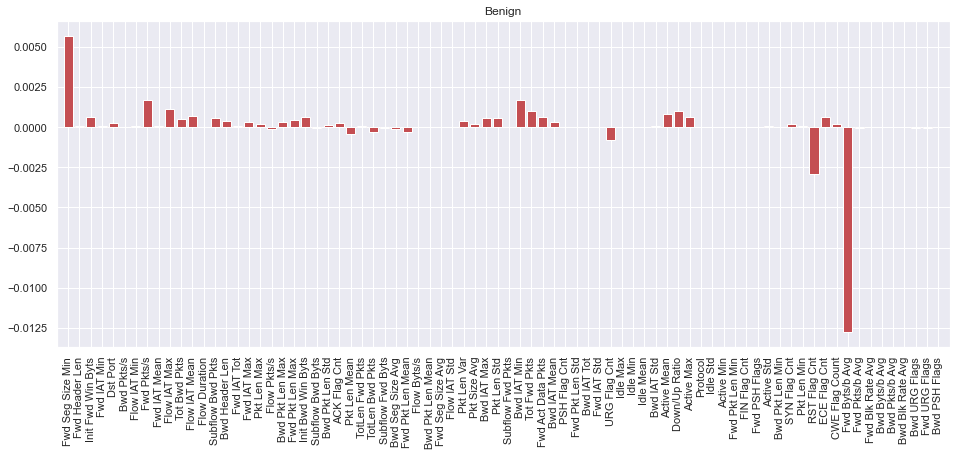

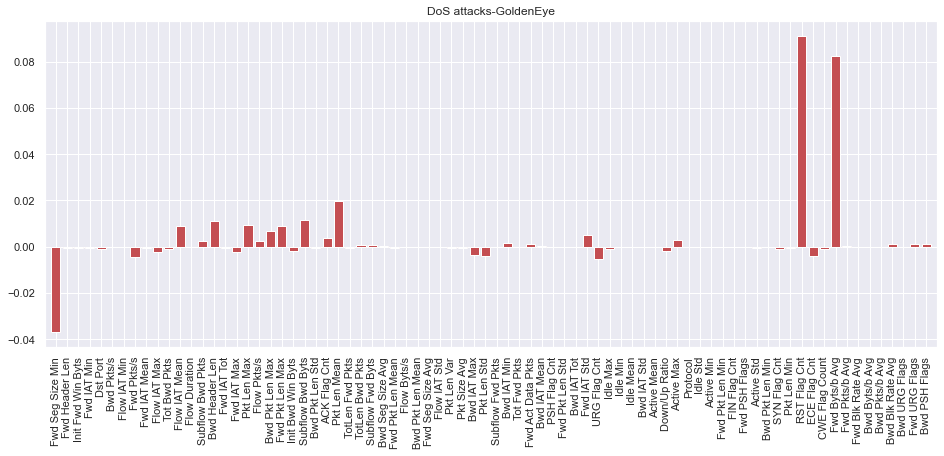

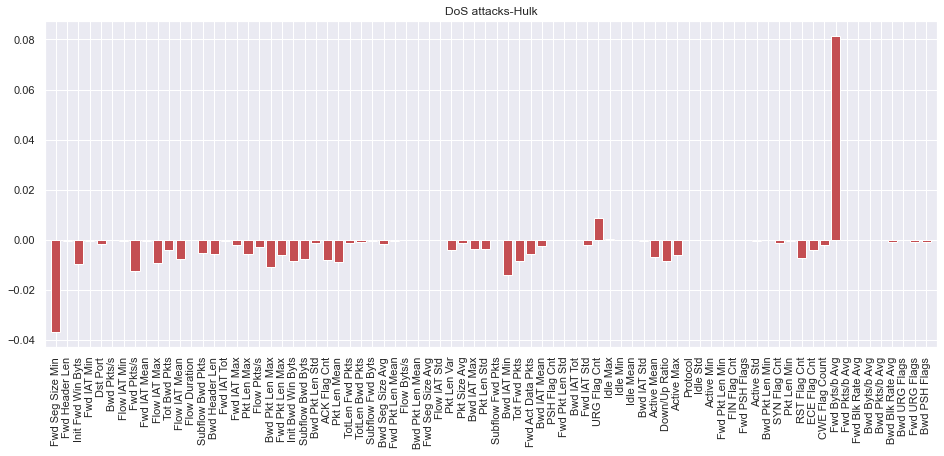

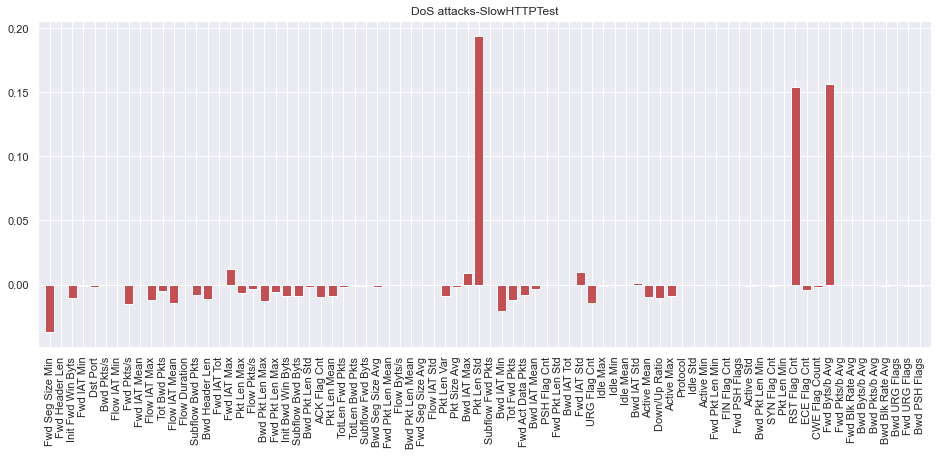

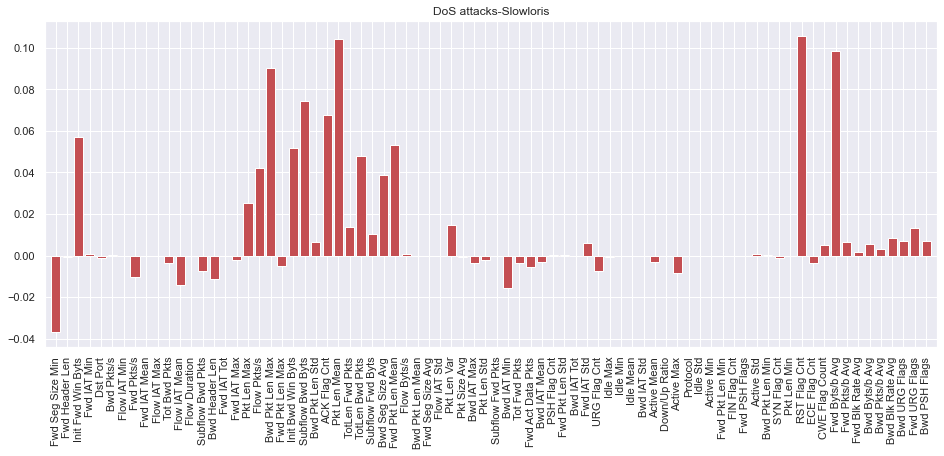

In [34]:
#Plotando features importances por classe

titles = list(label_encoder.classes_)
for t, i in zip(titles, range(len(result))):
    plt.figure()
    plt.rcParams['figure.figsize'] = [16, 6]
    plt.title(t)
    plt.bar(range(len(result[i])), result[i].values(),
           color="r", align="center")
    plt.xticks(range(len(result[i])), ff[list(result[i].keys())], rotation=90)
    plt.xlim([-1, len(result[i])])
    plt.show()

In [35]:
classes_features_importance = pd.DataFrame(result)

In [36]:
classes_features_importance.iloc[:,4].sort_values(ascending= False)

66    0.105950
25    0.104417
69    0.098538
19    0.090234
22    0.074456
        ...   
7    -0.010321
14   -0.011114
11   -0.014072
40   -0.015640
0    -0.036895
Name: 4, Length: 78, dtype: float64

Variable: Fwd Byts/b Avg       Importance: 0.08
Variable: Pkt Len Var          Importance: 0.07
Variable: RST Flag Cnt         Importance: 0.06
Variable: Fwd Seg Size Min     Importance: 0.05
Variable: Pkt Len Mean         Importance: 0.05
Variable: Dst Port             Importance: 0.03
Variable: Bwd Pkt Len Max      Importance: 0.03
Variable: Fwd Pkt Len Max      Importance: 0.03
Variable: Subflow Bwd Byts     Importance: 0.03
Variable: Bwd IAT Max          Importance: 0.03
Variable: Pkt Len Std          Importance: 0.03
Variable: Init Fwd Win Byts    Importance: 0.02
Variable: Fwd Pkts/s           Importance: 0.02
Variable: Flow IAT Mean        Importance: 0.02
Variable: Fwd IAT Max          Importance: 0.02
Variable: Pkt Len Max          Importance: 0.02
Variable: Init Bwd Win Byts    Importance: 0.02
Variable: ACK Flag Cnt         Importance: 0.02
Variable: Pkt Size Avg         Importance: 0.02
Variable: Bwd IAT Min          Importance: 0.02
Variable: SYN Flag Cnt         Importanc

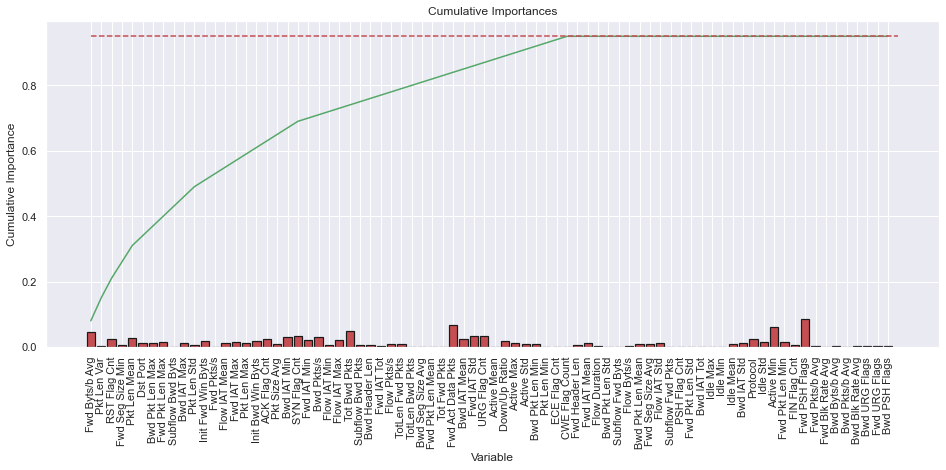

Number of features for 95% importance: 47


In [37]:
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');
plt.show()
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

# Aplicando RandomizedSearchCV

In [38]:
#Treinando Random Forest Classifier

from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_clf_RS = RandomForestClassifier(random_state=42)

rnd_search_forest = RandomizedSearchCV(forest_clf_RS, 
                                param_distributions=param_distribs,
                                n_iter=5, 
                                cv=5, 
                                scoring='accuracy',
                                n_jobs=-1)

In [39]:
start_time = time.process_time()
rnd_search_forest.fit(Xtrain, Ytrain)
print(time.process_time()-start_time, 'seconds')

192.78125 seconds


In [40]:
#Criando Y predito

y_pred2 = rnd_search_forest.predict(Xtest)

#Verificando resultados

print(classification_report(Ytest, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    318070
           1       1.00      1.00      1.00     10351
           2       1.00      1.00      1.00     36300
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00      2477

    accuracy                           1.00    367212
   macro avg       1.00      1.00      1.00    367212
weighted avg       1.00      1.00      1.00    367212



In [68]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(20,15))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    


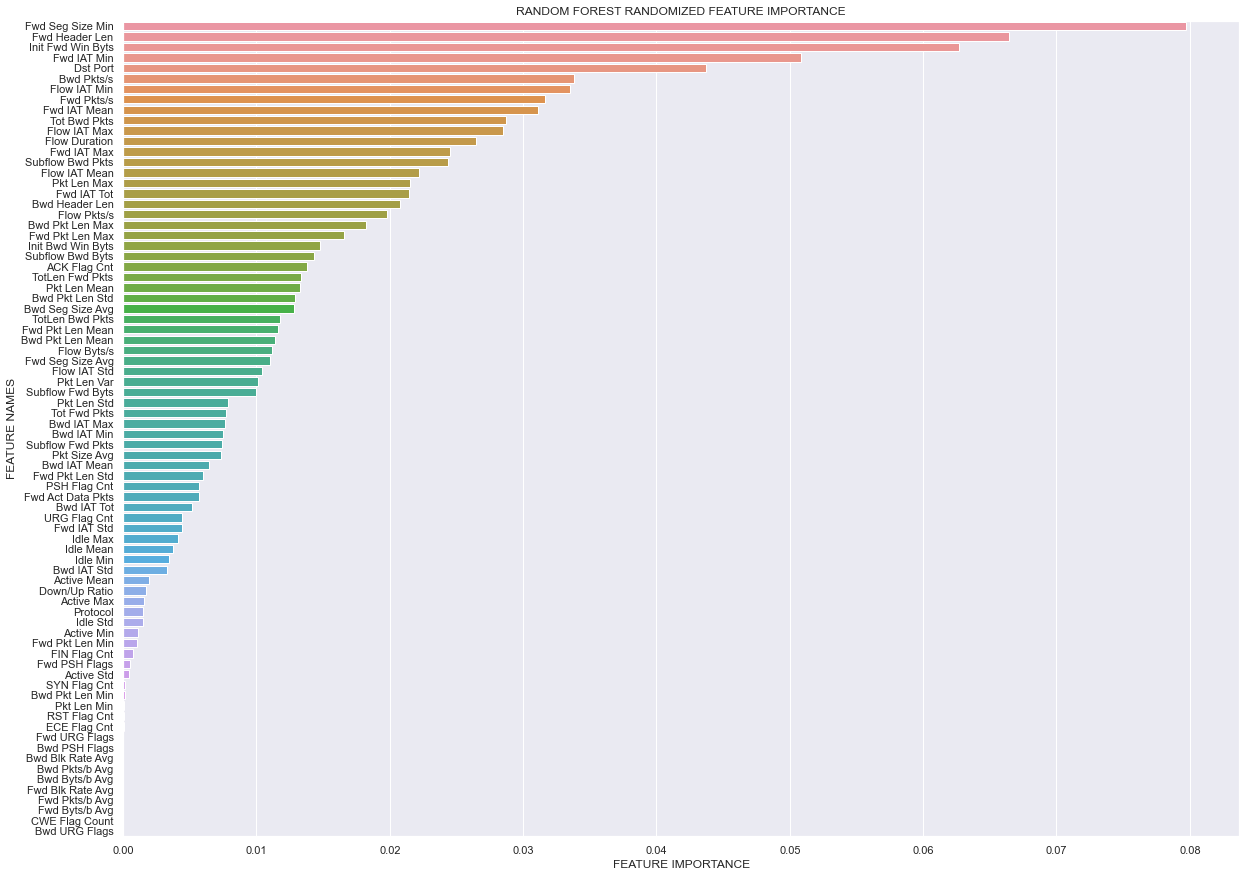

In [42]:
plot_feature_importance(rnd_search_forest.best_estimator_.feature_importances_,Xtrain.columns,'RANDOM FOREST RANDOMIZED ')

In [ ]:
rfc = RandomForestClassifier()

#Criando o modelo RFE e selecionando 15 atributos
rfe = RFE(rfc, n_features_to_select=40)
rfe = rfe.fit(train, ytrain)

#Sumarizando os atributos selecionados
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), train.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

In [67]:
rnd_search_forest.best_estimator_.feature_importances_

array([4.36886704e-02, 1.51365746e-03, 2.64606699e-02, 7.68677422e-03,
       2.87365930e-02, 1.33395283e-02, 1.17975762e-02, 1.66016786e-02,
       1.01687161e-03, 1.16211502e-02, 5.95917698e-03, 1.82537747e-02,
       1.09422286e-04, 1.14048471e-02, 1.28877357e-02, 1.11824305e-02,
       1.98109422e-02, 2.22179437e-02, 1.03823365e-02, 2.84970478e-02,
       3.35072279e-02, 2.14508706e-02, 3.11340158e-02, 4.38814110e-03,
       2.45217415e-02, 5.08588954e-02, 5.18786400e-03, 6.41808197e-03,
       3.29226584e-03, 7.66835125e-03, 7.52508584e-03, 5.07542523e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.64699217e-02,
       2.07834854e-02, 3.16703590e-02, 3.38131275e-02, 9.92625516e-05,
       2.15544790e-02, 1.32660514e-02, 7.87142194e-03, 1.01496941e-02,
       7.18239721e-04, 1.74917662e-04, 4.99349998e-05, 5.71113979e-03,
       1.37566020e-02, 4.41516244e-03, 0.00000000e+00, 4.19385845e-05,
       1.73906119e-03, 7.32294700e-03, 1.10124333e-02, 1.28476678e-02,
      

In [44]:
from sklearn.multiclass import OneVsRestClassifier

clf = OneVsRestClassifier(forest_clf_RS, n_jobs=-1).fit(Xtrain, Ytrain)

In [46]:
y_pred = clf.predict(Xtest)

print(classification_report(Ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    318070
           1       1.00      1.00      1.00     10351
           2       1.00      1.00      1.00     36300
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00      2477

    accuracy                           1.00    367212
   macro avg       1.00      1.00      1.00    367212
weighted avg       1.00      1.00      1.00    367212



In [47]:
from sklearn.multiclass import OneVsOneClassifier

clf_ovo = OneVsOneClassifier(forest_clf_RS).fit(Xtrain, Ytrain)

In [48]:
y_pred2 = clf_ovo.predict(Xtest)

print(classification_report(Ytest, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    318070
           1       1.00      1.00      1.00     10351
           2       1.00      1.00      1.00     36300
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00      2477

    accuracy                           1.00    367212
   macro avg       1.00      1.00      1.00    367212
weighted avg       1.00      1.00      1.00    367212



# Aplicando DL

In [49]:
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models,optimizers

#Normalização dos dados

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
XtrainS = scaler.fit_transform(Xtrain)
XtestS = scaler.transform(Xtest)

In [50]:
#Convertendo os Labels para OneHotEncoding

Ytrain_onehot = keras.utils.to_categorical(Ytrain, num_classes = 15)
Ytest_onehot = keras.utils.to_categorical(Ytest, num_classes = 15)

# imprime os 5 primeiros valores para exemplificar
print("### Antes ###")
print(Ytrain[:5])
print(Ytest[:5])

print("\n### Depois ###")
print(Ytrain_onehot[:5])
print(Ytest_onehot[:5])

### Antes ###
1327070    0
388471     0
1262451    0
261472     0
808699     0
Name: Label, dtype: int32
957887     0
1987544    2
1487371    0
429839     0
219813     0
Name: Label, dtype: int32

### Depois ###
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [51]:
from sklearn.model_selection import train_test_split

Xtrain_DL, Xval_DL, Ytrain_DL, Yval_DL = train_test_split(XtrainS, Ytrain_onehot, test_size=0.1, random_state=42, shuffle=True, stratify=Ytrain_onehot)

In [52]:
tamanho=Xtrain_DL.shape
tamanho

(991471, 78)

In [53]:
#Criando modelo

model=models.Sequential()
model.add(layers.Dense(100, activation='tanh', input_dim=tamanho[1]))
model.add(layers.Dense(100,activation='tanh'))
model.add(layers.Dense(100,activation='tanh'))
model.add(layers.Dense(100,activation='tanh'))
model.add(layers.Dense(100,activation='tanh'))
model.add(layers.Dense(15,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               7900      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 15)                1515      
                                                                 
Total params: 49,815
Trainable params: 49,815
Non-traina

In [54]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

In [55]:
history = model.fit(Xtrain_DL,Ytrain_DL, epochs = 20,batch_size = 256, validation_data=(Xval_DL,Yval_DL))

Epoch 1/20
3873/3873 [==============================] - 7s 2ms/step - loss: 0.0150 - acc: 0.9968 - val_loss: 0.0019 - val_acc: 0.9996
Epoch 2/20
3873/3873 [==============================] - 7s 2ms/step - loss: 0.0054 - acc: 0.9988 - val_loss: 0.0025 - val_acc: 0.9996
Epoch 3/20
3873/3873 [==============================] - 7s 2ms/step - loss: 0.0060 - acc: 0.9986 - val_loss: 0.0023 - val_acc: 0.9997
Epoch 4/20
3873/3873 [==============================] - 7s 2ms/step - loss: 0.0042 - acc: 0.9991 - val_loss: 0.0036 - val_acc: 0.9995
Epoch 5/20
3873/3873 [==============================] - 7s 2ms/step - loss: 0.0086 - acc: 0.9980 - val_loss: 0.0215 - val_acc: 0.9947
Epoch 6/20
3873/3873 [==============================] - 7s 2ms/step - loss: 0.0026 - acc: 0.9994 - val_loss: 0.0013 - val_acc: 0.9997
Epoch 7/20
3873/3873 [==============================] - 7s 2ms/step - loss: 0.0077 - acc: 0.9982 - val_loss: 0.0210 - val_acc: 0.9947
Epoch 8/20
3873/3873 [==============================] - 7s 2ms

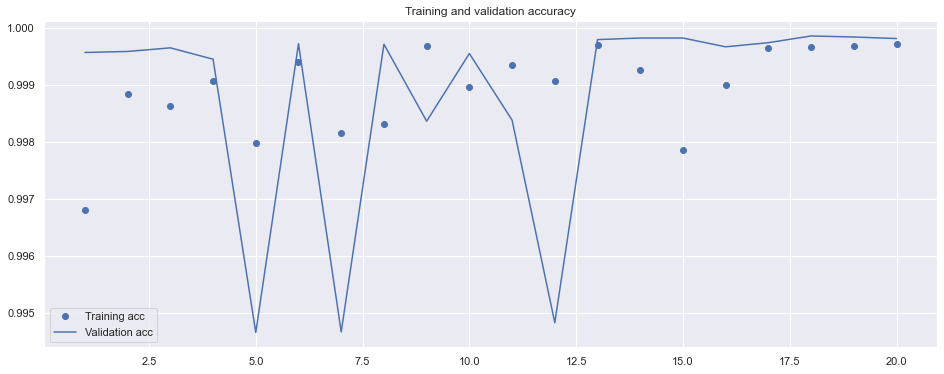

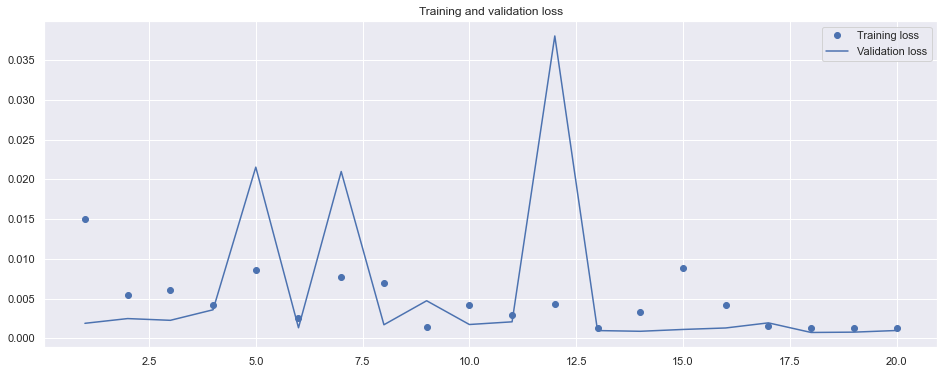

In [56]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [57]:
# Desempenho no conjunto de teste
loss, acc = model.evaluate(XtestS, Ytest_onehot, batch_size=128, verbose=0)
print('    Test Loss: ',loss)
print('Test accuracy: ',acc)

    Test Loss:  0.0012278418289497495
Test accuracy:  0.9997658133506775


In [58]:
pred2 = model.predict(XtestS)

predicted2 = np.where(pred2 > .5, 1, 0)

11476/11476 [==============================] - 10s 470us/step


In [59]:
correct_indices2 = predicted2 == Ytest_onehot
incorrect_indices2 = predicted2 != Ytest_onehot
print(correct_indices2.sum(), "Amostras classificadas corretamente") 
print(incorrect_indices2.sum(), " Amostras classificadas incorretamente")

5508008 Amostras classificadas corretamente
172  Amostras classificadas incorretamente


In [60]:
print(classification_report(Ytest_onehot, predicted2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    318070
           1       1.00      1.00      1.00     10351
           2       1.00      1.00      1.00     36300
           3       0.88      1.00      0.93        14
           4       0.99      1.00      0.99      2477
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00    367212
   macro avg       0.32      0.33      0.33    367212
weighted avg       1.00   

In [62]:
# análise de correlação

correlation = df2.corr()

<AxesSubplot:>

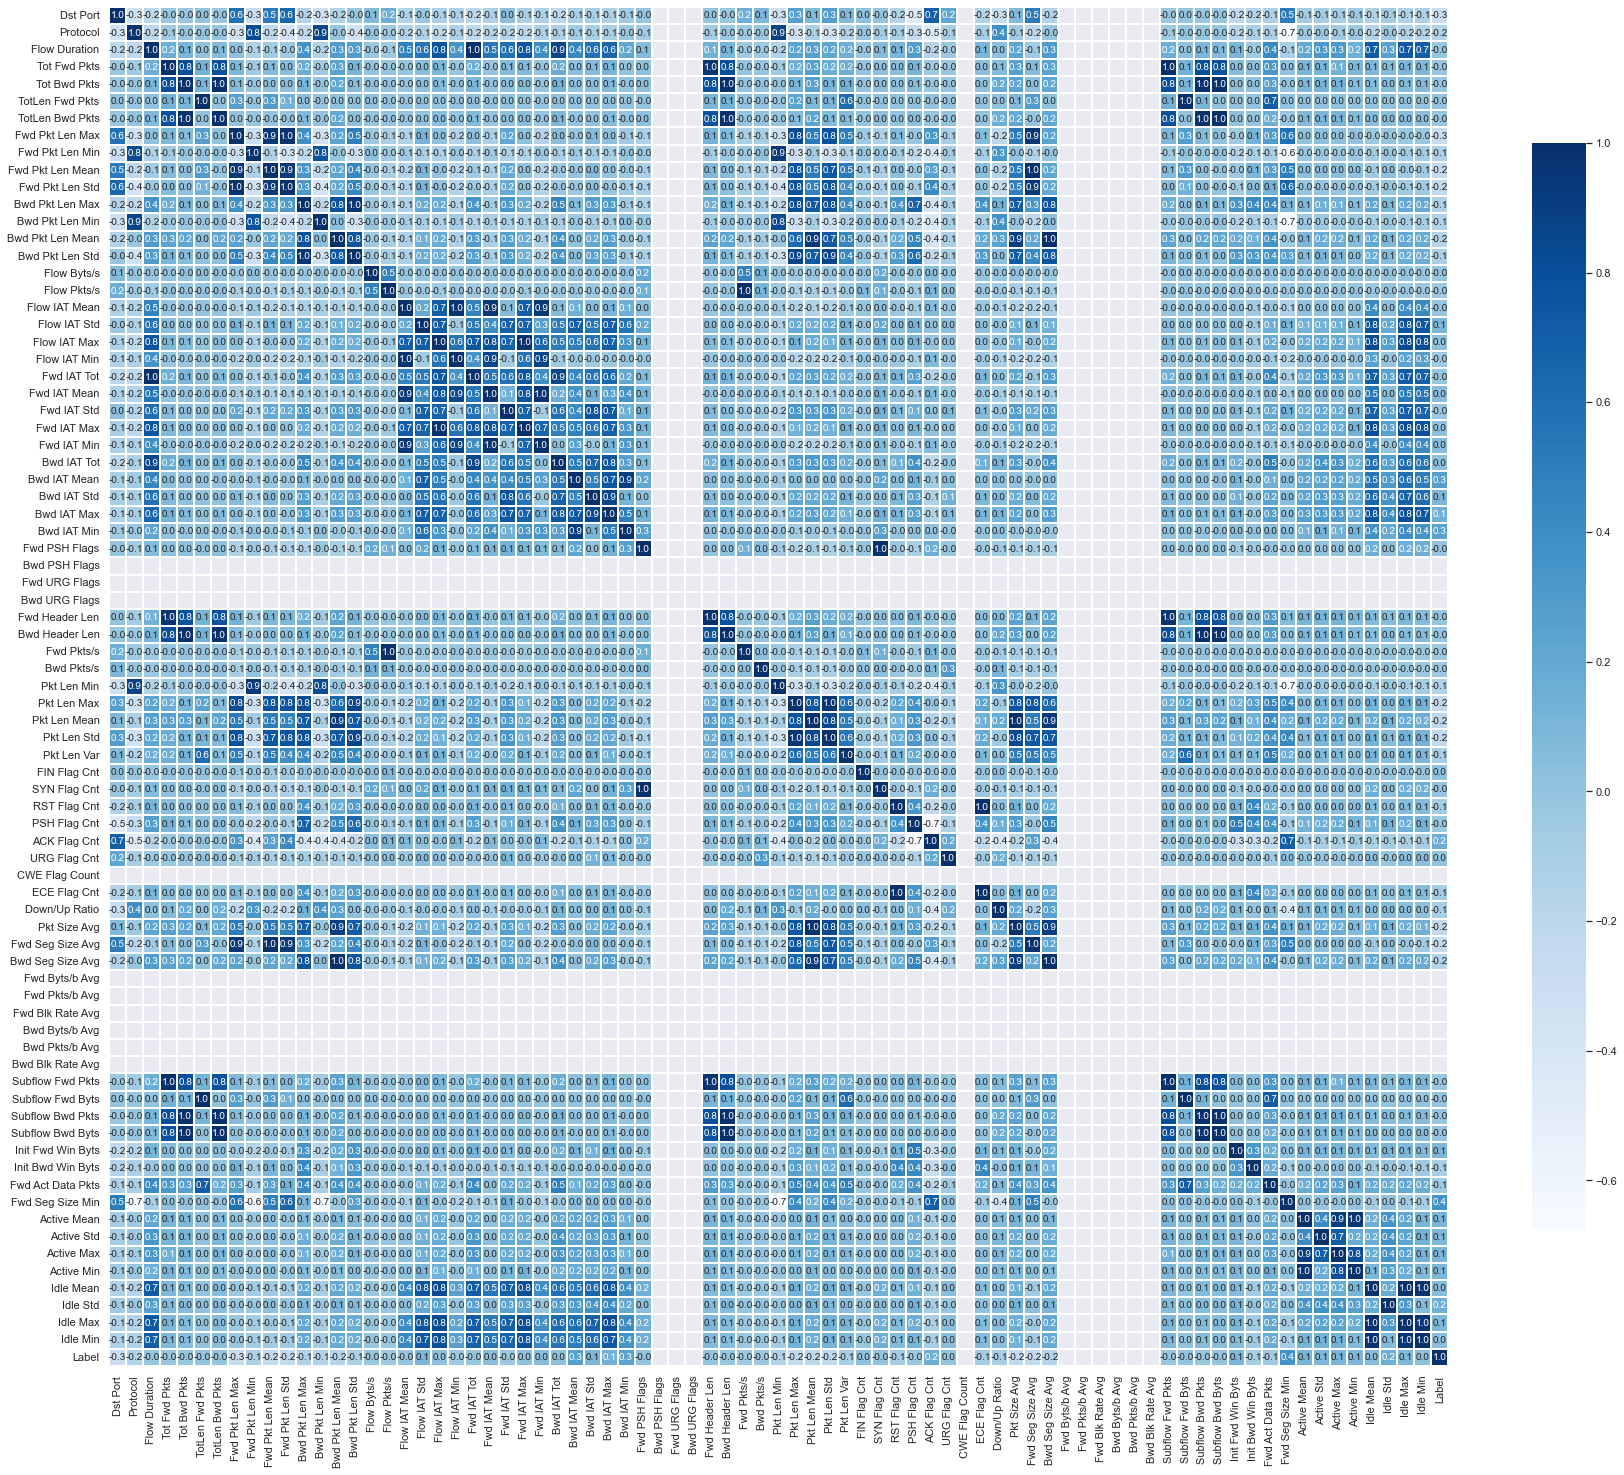

In [63]:
# plot da matriz de correlação
import seaborn as sn
plt.subplots(figsize=(30, 25))
plot = sn.heatmap(correlation,cmap='Blues',linewidth=0.1,cbar_kws={"shrink": .8},annot=True, fmt=".1f")
plot